# Evaluacion

### Regresion

In [5]:
import warnings
warnings.simplefilter('ignore')

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split as tts

In [2]:
data=load_diabetes()

In [3]:
X_train, X_test, y_train, y_test=tts(data.data, data.target)

In [6]:
rf=RFR()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [9]:
# MSE
from sklearn.metrics import mean_squared_error as mse

mse(y_pred, y_test)

4382.82963963964

In [10]:
# RMSE

mse(y_pred, y_test)**0.5

66.20294283217054

In [11]:
# RMSLE

from sklearn.metrics import mean_squared_log_error as rmsle

rmsle(y_pred, y_test)

0.23260090371290484

In [12]:
# MAE

from sklearn.metrics import mean_absolute_error as mae

mae(y_pred, y_test)

55.10720720720721

In [17]:
# R2

from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.33218926788534286

In [14]:
rf.score(X_test, y_test)

0.33218926788534286

### Clasificacion

In [18]:
from sklearn.datasets import load_wine

data=load_wine()

X_train, X_test, y_train, y_test=tts(data.data, data.target)

In [20]:
from sklearn.svm import SVC

svc=SVC().fit(X_train, y_train)

y_pred=svc.predict(X_test)

In [21]:
# Accuracy

from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred)

0.3333333333333333

In [22]:
svc.score(X_test, y_test)

0.3333333333333333

In [24]:
# Precision

from sklearn.metrics import precision_score as prec

prec(y_test, y_pred, average='macro')

0.7674418604651163

In [27]:
# Recall

from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

0.3795093795093795

In [28]:
# F1_Score

from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')

0.24062049062049062

In [29]:
# Matriz de Confusion

from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred)

array([[ 1, 10,  0],
       [ 0, 13,  0],
       [ 0, 20,  1]])

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

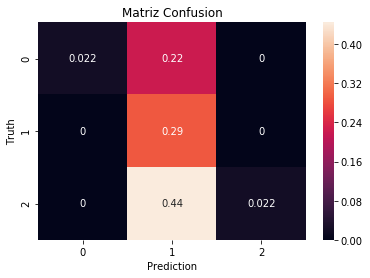

In [31]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)
b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)
plt.title('Matriz Confusion')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show();

In [33]:
# ROC-AUC

from sklearn.datasets import load_breast_cancer

In [34]:
data=load_breast_cancer()
X_train, X_test, y_train, y_test=tts(data.data, data.target)

In [35]:
svc=SVC(probability=True).fit(X_train, y_train)

In [36]:
y_pred=svc.predict(X_test)
y_prob=svc.predict_proba(X_test)[::,1]

In [37]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

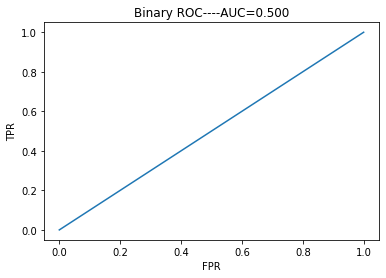

In [39]:
fpr, tpr, umbrales=roc(y_test, y_pred)
a=auc(y_test, y_pred)
plt.plot(fpr, tpr)
#plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Binary ROC----AUC={:.3f}'.format(a))
plt.show();

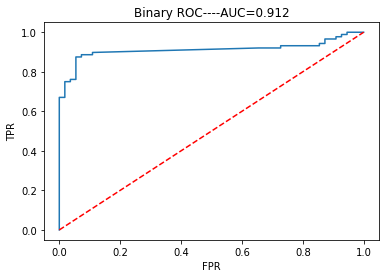

In [40]:
fpr, tpr, umbrales=roc(y_test, y_prob)
a=auc(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Binary ROC----AUC={:.3f}'.format(a))
plt.show();

# HyperOpt